# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Import the KMeans module
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data = pd.read_csv('Categorical.csv')

data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [3]:
data['continent'].value_counts()

Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: continent, dtype: int64

Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [6]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [7]:
#select columns 1,2,3

#create variable 
#iloc grabs slices of data from a PANDAS DATAFRAME
#first position defines the num of rows 
#second position defines which columns
x = data_mapped.iloc[:,1:4]

x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,2
2,17.537368,-12.293361,3
3,-63.064989,18.223959,0
4,20.049834,41.142450,1
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,2
238,25.083901,-29.000341,3
239,27.774759,-13.458242,3


## Clustering

Use 4 clusters initially.

In [8]:
#create cluster object
kmeans = KMeans(4)

#fit the input data i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [9]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)

identified_clusters

array([2, 3, 3, 2, 0, 0, 0, 3, 2, 3, 2, 3, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0,
       1, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 2, 1, 0, 3,
       3, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 3, 3,
       0, 0, 3, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3,
       1, 3, 3, 3, 3, 1, 2, 2, 1, 0, 3, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 0,
       1, 2, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 3, 2, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 0, 3,
       3, 2, 0, 3, 2, 0, 0, 0, 3, 2, 3, 3, 2, 3, 0, 1, 3, 3, 1, 2, 2, 0,
       0, 1, 3, 3, 0, 2, 2, 3, 0, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3],
      dtype=int32)

In [10]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy() 

# Create a new column, containing the identified cluster for each observation
data_with_clusters['Clusters'] = identified_clusters

#check
data_with_clusters

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,3
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,1,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,2,3
238,South Africa,25.083901,-29.000341,3,3
239,Zambia,27.774759,-13.458242,3,3


## Plot the data

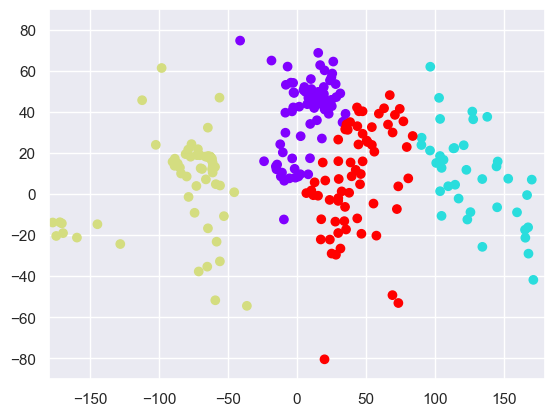

In [12]:
#create scatter 
#c tells us how many clusters should be tied to the dataset
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.